If You are using Google Collab Uncomment the following to install required Python packages. 

In [53]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install matplotlib
# !pip install seaborn

###Importing Necessary Libraries

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split as tts
import pickle

### Importing Dataset

In [55]:
pima_df = pd.read_csv("./content/sample_data/Pima Indians Diabetes Dataset - diabetes.csv")
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Data Cleaning**

1.   Replacing all the 0 with null value.
2.   Fill all the null values with the mean value of that column.

This is done beacuse no a number row will not be counted in mean.



In [56]:
# Glucose
pima_df['Glucose'].replace(0, np.NaN, inplace=True)
mean_Glucose = pima_df['Glucose'].mean()
pima_df['Glucose'].fillna(mean_Glucose, inplace=True)

In [57]:
# BloodPressure
pima_df['BloodPressure'].replace(0, np.NaN, inplace=True)
mean_BloodPressure = pima_df['BloodPressure'].mean()
pima_df['BloodPressure'].fillna(mean_BloodPressure, inplace=True)

In [58]:
# SkinThickness
pima_df['SkinThickness'].replace(0, np.NaN, inplace=True)
mean_SkinThickness = pima_df['SkinThickness'].mean()
pima_df['SkinThickness'].fillna(mean_SkinThickness, inplace=True)

In [59]:
# Insulin
pima_df['Insulin'].replace(0, np.NaN, inplace=True)
mean_Insulin = pima_df['Insulin'].mean()
pima_df['Insulin'].fillna(mean_Insulin, inplace=True)

In [60]:
# BMI
pima_df['BMI'].replace(0, np.NaN, inplace=True)
mean_BMI = pima_df['BMI'].mean()
pima_df['BMI'].fillna(mean_BMI, inplace=True)

###Feature Scaling


1.   Preparing Feature Vector and Obesrvation Vector. 
2.   Normalizing them.



In [61]:
# StSc = StandardScaler()

In [62]:
features_X = pima_df.drop(["Outcome"], axis=1)
print(features_X.head())
# features_X = pd.DataFrame(StSc.fit_transform(features_X),
#                           columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
#                                    'DiabetesPedigreeFunction', 'Age'])
# print(features_X.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [63]:
observation_Y = pima_df['Outcome']
print(observation_Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Gradient Boosting Algorightm

### Train Test Split

In [64]:
tr_X, te_X, tr_Y, te_Y = tts(features_X, observation_Y, test_size=0.1, random_state=42, stratify=observation_Y)

In [65]:
print("Train X Size:", tr_X.shape)
print("Test X Size:", te_X.shape)
print("Train Y Size:", tr_Y.shape)
print("Test Y Size:", te_Y.shape)


Train X Size: (691, 8)
Test X Size: (77, 8)
Train Y Size: (691,)
Test Y Size: (77,)


In [66]:
recallScore = []

# trying different learning rate
learning_rate = np.linspace(0, 1, 101)
learning_rate = np.append(learning_rate, 0.1)
best_learning_rate = 0.1
best_recall = 0

for i in learning_rate:
    if i == 0:
        continue
    my_grdBst = GradientBoostingClassifier(learning_rate=i)
    my_grdBst.fit(tr_X, tr_Y)
    pred_Y = my_grdBst.predict(te_X)
    rs = recall_score(te_Y, pred_Y)
    recallScore.append(rs)
    if rs > best_recall:
        best_recall = rs
        best_learning_rate = i

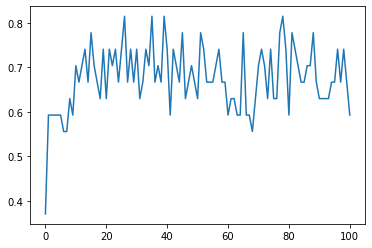

In [67]:
plt.plot(recallScore)

In [68]:
print("best learning rate found is: ", best_learning_rate)
print("recall found at that learning rate is", best_recall)

best learning rate found is:  0.27
recall found at that learning rate is 0.8148148148148148


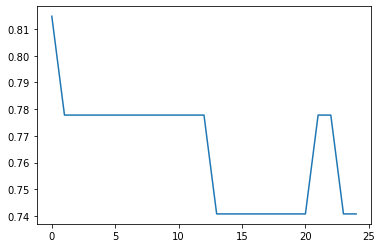

In [69]:
# changing number of iterations
n_itrs = np.linspace(100, 500, 25)
best_n_iters = 0
best_recall = 0
recallScore = []
for i in n_itrs:
    my_grdBst = GradientBoostingClassifier(learning_rate=best_learning_rate, n_estimators=int(i))
    my_grdBst.fit(tr_X, tr_Y)
    pred_Y = my_grdBst.predict(te_X)
    rs = recall_score(te_Y, pred_Y)
    recallScore.append(rs)
    if rs > best_recall:
        best_recall = rs
        best_n_iters = int(i)

plt.plot(recallScore)

In [70]:
print("best no of iterations is:", best_n_iters)
print("recall coresponding to that is: ", best_recall)

best no of iterations is: 100
recall coresponding to that is:  0.8148148148148148


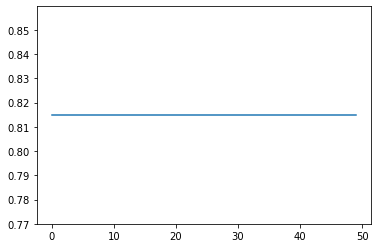

In [71]:
recallScore = []

# trying different random state
random_state1 = np.linspace(1, 100, 50)
best_random_state = 0

for i in random_state1:
    if i == 0:
        continue
    my_grdBst = GradientBoostingClassifier(random_state=int(i), learning_rate=best_learning_rate,
                                           n_estimators=best_n_iters)
    my_grdBst.fit(tr_X, tr_Y)
    pred_Y = my_grdBst.predict(te_X)
    rs = recall_score(te_Y, pred_Y)
    recallScore.append(rs)
    if rs > best_recall:
        best_recall = rs
        best_random_state = int(i)

plt.plot(recallScore)

In [72]:
print("best random_state rate found is: ", best_random_state)
print("recall found at that learning rate is", best_recall)

best random_state rate found is:  0
recall found at that learning rate is 0.8148148148148148


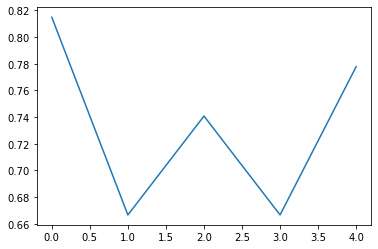

In [73]:
# changing min_samples_split
min_samples_split_tests = [2, 3, 4, 5, 6]
best_min_sample_split = 0
best_recall = 0
recallScore = []
for i in min_samples_split_tests:
    if i == 0:
        continue
    my_grdBst = GradientBoostingClassifier(random_state=best_random_state, learning_rate=best_learning_rate,
                                           n_estimators=best_n_iters, min_samples_split=i)
    my_grdBst.fit(tr_X, tr_Y)
    pred_Y = my_grdBst.predict(te_X)
    rs = recall_score(te_Y, pred_Y)
    recallScore.append(rs)
    if rs > best_recall:
        best_recall = rs
        best_min_sample_split = i

plt.plot(recallScore)

In [74]:
print("best min_sample_split found is: ", best_min_sample_split)
print("recall found at that learning rate is", best_recall)

best min_sample_split found is:  2
recall found at that learning rate is 0.8148148148148148


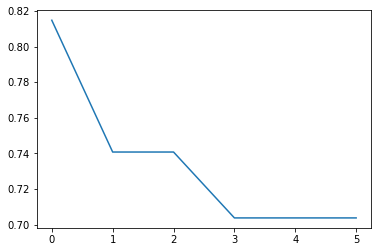

In [75]:
# changing min_samples_split
min_samples_leaf_tests = [1, 2, 3, 4, 5, 6]
best_min_sample_leaf = 0
best_recall = 0
recallScore = []
for i in min_samples_leaf_tests:
    if i == 0:
        continue
    my_grdBst = GradientBoostingClassifier(random_state=best_random_state, learning_rate=best_learning_rate,
                                           n_estimators=best_n_iters, min_samples_split=best_min_sample_split,
                                           min_samples_leaf=i)
    my_grdBst.fit(tr_X, tr_Y)
    pred_Y = my_grdBst.predict(te_X)
    rs = recall_score(te_Y, pred_Y)
    recallScore.append(rs)
    if rs > best_recall:
        best_recall = rs
        best_min_sample_leaf = i

plt.plot(recallScore)

In [76]:
print("best min_sample_leaf found is: ", best_min_sample_leaf)
print("recall found to that is", best_recall)

best min_sample_leaf found is:  1
recall found to that is 0.8148148148148148


In [77]:
print("the best factors found are: ")
print("learning rate:", best_learning_rate)
print("n_estimators:", best_n_iters)
print("random_state", best_random_state)
print("min_sample_split", best_min_sample_split)
print("min_sample_leaf", best_min_sample_leaf)

the best factors found are: 
learning rate: 0.27
n_estimators: 100
random_state 0
min_sample_split 2
min_sample_leaf 1


In [78]:
my_grdBst = GradientBoostingClassifier(random_state=best_random_state, learning_rate=best_learning_rate,
                                       n_estimators=best_n_iters, min_samples_split=best_min_sample_split,
                                       min_samples_leaf=best_min_sample_leaf)
my_grdBst.fit(tr_X, tr_Y)
pred_Y = my_grdBst.predict(te_X)

pickle.dump(my_grdBst, open("../models/Gradient_Boosting.pkl",'wb'))

In [79]:
print("recall score: ", recall_score(te_Y,pred_Y))
print("precision_score", precision_score(te_Y, pred_Y))
print("roc_auc_score", roc_auc_score(te_Y, pred_Y))
print("confusion matrix:",confusion_matrix(te_Y, pred_Y))



recall score:  0.8148148148148148
precision_score 0.7586206896551724
roc_auc_score 0.8374074074074074
confusion matrix: [[43  7]
 [ 5 22]]
